<a href="https://colab.research.google.com/github/sheikhmishi2001-commits/Task1/blob/main/student_score_prrediction_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


Load Dataset

In [2]:
data = pd.read_csv("student.csv")

print("Dataset Info:\n")
print(data.info())
print("\nFirst 5 rows:\n", data.head())

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 

In [3]:
# Drop duplicates
data = data.drop_duplicates()

In [4]:

# Drop rows with missing values (or you can fill with mean/median)
data = data.dropna()

In [5]:
# Ensure numeric types
data['Hours_Studied'] = pd.to_numeric(data['Hours_Studied'], errors='coerce')
data['Exam_Score'] = pd.to_numeric(data['Exam_Score'], errors='coerce')

In [8]:
# Remove rows where conversion failed
data = data.dropna(subset=['Hours_Studied', 'Exam_Score'])

In [9]:
X = data[['Hours_Studied']]       # Independent variable
y = data['Exam_Score']          # Dependent variable

In [10]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [11]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

In [12]:
#Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

In [13]:
# Step 6: Evaluation Function
def evaluate_model(y_true, y_pred, name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_true, y_pred)
    return {"Model": name, "MAE": mae, "MSE": mse, "RMSE": rmse, "R²": r2}

results = []
results.append(evaluate_model(y_test, y_pred_linear, "Linear Regression"))
results.append(evaluate_model(y_test, y_pred_poly, "Polynomial Regression (deg=2)"))

results_df = pd.DataFrame(results)
print("\nModel Performance Comparison:")
print(results_df)


Model Performance Comparison:
                           Model       MAE        MSE      RMSE        R²
0              Linear Regression  2.529242  12.351734  3.514503  0.205131
1  Polynomial Regression (deg=2)  2.528561  12.352544  3.514619  0.205078


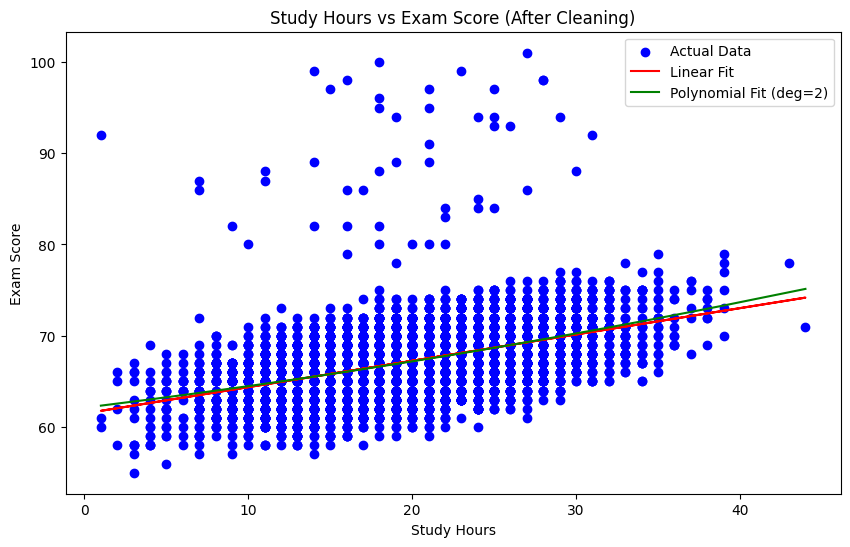

In [14]:
# Step 7: Visualization
# -----------------------------
plt.figure(figsize=(10,6))
plt.scatter(X, y, color="blue", label="Actual Data")

# Linear Fit
plt.plot(X, linear_model.predict(X), color="red", label="Linear Fit")

# Polynomial Fit (sorted for smooth curve)
X_sorted = X.sort_values(by="Hours_Studied")
plt.plot(X_sorted, poly_model.predict(poly.transform(X_sorted)),
         color="green", label="Polynomial Fit (deg=2)")

plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.title("Study Hours vs Exam Score (After Cleaning)")
plt.legend()
plt.show()

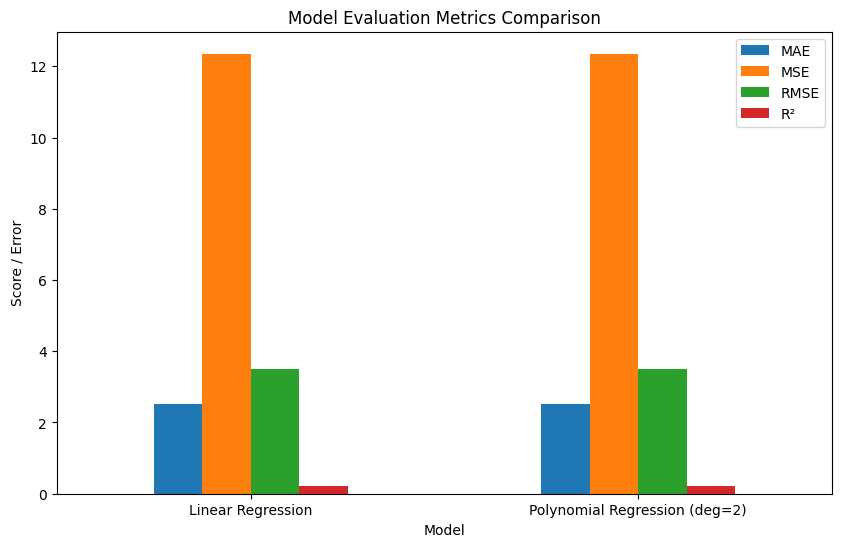

In [15]:
# Step 8: Metrics Comparison Plot
# -----------------------------
metrics = ["MAE", "MSE", "RMSE", "R²"]
results_df.set_index("Model")[metrics].plot(kind="bar", figsize=(10,6))
plt.title("Model Evaluation Metrics Comparison")
plt.ylabel("Score / Error")
plt.xticks(rotation=0)
plt.show()